In [1]:
import numpy as np
import pandas as pd

import os, nltk, string, gensim, warnings, pickle

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Corona_NLP_train.csv', encoding = "ISO-8859-1")

df = df[['OriginalTweet', 'Sentiment']]
df

OriginalTweet           Sentiment
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral
1      advice Talk to your neighbours family to excha...            Positive
2      Coronavirus Australia: Woolworths to give elde...            Positive
3      My food stock is not the only one which is emp...            Positive
4      Me, ready to go at supermarket during the #COV...  Extremely Negative
...                                                  ...                 ...
41152  Airline pilots offering to stock supermarket s...             Neutral
41153  Response to complaint not provided citing COVI...  Extremely Negative
41154  You know itÂs getting tough when @KameronWild...            Positive
41155  Is it wrong that the smell of hand sanitizer i...             Neutral
41156  @TartiiCat Well new/used Rift S are going for ...            Negative

[41157 rows x 2 columns]

In [3]:
def csvtotext(df):
  text = df.to_csv(sep=' ', index=False, header=False).lower()
  return(text)

In [4]:
def cleantext(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if len(word)>1]
        
    return(tokens)

In [5]:
df['OriginalTweet']

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [6]:
text = csvtotext(df['OriginalTweet'])
text

'"@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8"\r\n"advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate supplies of regular meds but not over order"\r\n"coronavirus australia: woolworths to give elderly, disabled dedicated shopping hours amid covid-19 outbreak https://t.co/binca9vp8p"\r\n"my food stock is not the only one which is empty...\r\r\n\r\r\nplease, don\'t panic, there will be enough food for everyone if you do not take more than you need. \r\r\nstay calm, stay safe.\r\r\n\r\r\n#covid19france #covid_19 #covid19 #coronavirus #confinement #confinementotal #confinementgeneral https://t.co/zrlg0z520j"\r\n"me, ready to go at supermarket during the #covid19 outbreak.\r\r\n\r\r\nnot because i\'m paranoid, but because my food stock is litteraly empty. the #coronavirus is a seriou

In [7]:
tokens = cleantext(text)
tokens

['menyrbie',
 'chrisitv',
 'https',
 'and',
 'https',
 'and',
 'https',
 'advice',
 'talk',
 'to',
 'your',
 'neighbours',
 'family',
 'to',
 'exchange',
 'phone',
 'numbers',
 'create',
 'contact',
 'list',
 'with',
 'phone',
 'numbers',
 'of',
 'neighbours',
 'schools',
 'employer',
 'chemist',
 'gp',
 'set',
 'up',
 'online',
 'shopping',
 'accounts',
 'if',
 'poss',
 'adequate',
 'supplies',
 'of',
 'regular',
 'meds',
 'but',
 'not',
 'over',
 'order',
 'coronavirus',
 'australia',
 'woolworths',
 'to',
 'give',
 'elderly',
 'disabled',
 'dedicated',
 'shopping',
 'hours',
 'amid',
 'outbreak',
 'https',
 'my',
 'food',
 'stock',
 'is',
 'not',
 'the',
 'only',
 'one',
 'which',
 'is',
 'empty',
 'please',
 'do',
 'panic',
 'there',
 'will',
 'be',
 'enough',
 'food',
 'for',
 'everyone',
 'if',
 'you',
 'do',
 'not',
 'take',
 'more',
 'than',
 'you',
 'need',
 'stay',
 'calm',
 'stay',
 'safe',
 'coronavirus',
 'confinement',
 'confinementotal',
 'confinementgeneral',
 'https',


In [8]:
def word_freq_analyser(tokens):
    freq = nltk.FreqDist(tokens)
    freqdf = pd.DataFrame.from_dict(freq,orient='index')
    freqdf = freqdf.reset_index()
    freqdf = freqdf.rename(columns={'index' : 'word', 0:'count'})
    freqdf = freqdf.sort_values(by = ['count'], ascending = False)
    freqdf = freqdf.reset_index(drop=True)
    freqdf = freqdf.reset_index()
    freqdf = freqdf.rename(columns={'index' : 'sno'})
    freqdf['sno'] = freqdf['sno'] + 1
    freqdf['distinct_word_%'] = freqdf['sno']/len(freqdf['sno']) * 100
    freqdf['cumsum'] = freqdf['count'].cumsum()
    freqdf['corpus_%'] = freqdf['cumsum'] / freqdf['count'].sum() * 100
    
    freqdf['distinct_word_%'] = np.round(freqdf['distinct_word_%'], 0)
    freqdf['corpus_%'] = np.round(freqdf['corpus_%'], 0)
    
    small_freq_df = freqdf.drop_duplicates(subset=['corpus_%'], keep = 'first')
    
    return(freqdf, small_freq_df)    

In [9]:
freqdf, small_freq_df = word_freq_analyser(tokens)

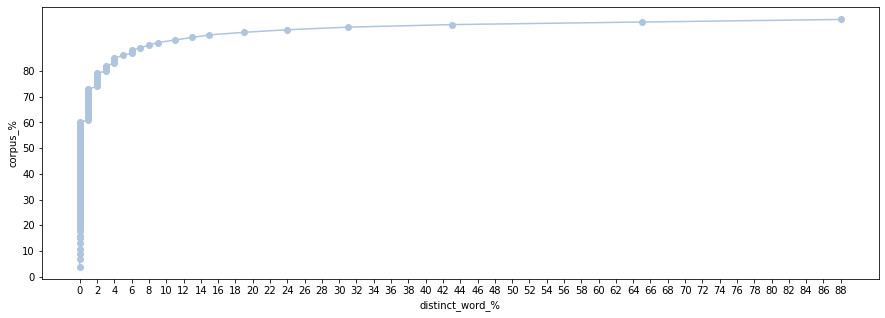

In [10]:
x = small_freq_df['distinct_word_%']
y = small_freq_df['corpus_%']

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)


ax.plot(x, y, **{'color': 'lightsteelblue', 'marker': 'o'})
plt.xticks(np.arange(min(x), max(x)+1, 2))
plt.yticks(np.arange(min(x), max(x)+1, 10))
plt.xlabel ('distinct_word_%')
plt.ylabel ('corpus_%')
plt.show()

In [11]:
small_freq_df.tail(11)

sno               word  count  distinct_word_%   cumsum  corpus_%
3960    3961                boy     22              8.0  1029481      90.0
4551    4552            roughly     18              9.0  1040994      91.0
5292    5293           apparent     14             11.0  1052491      92.0
6247    6248          indonesia     11             13.0  1063983      93.0
7504    7505       touchscreens      8             15.0  1075484      94.0
9205    9206              rumor      6             19.0  1086987      95.0
11683  11684         outofstock      4             24.0  1098492      96.0
15329  15330                ccl      2             31.0  1109993      97.0
21080  21081           droughts      2             43.0  1121495      98.0
32242  32243             viveat      1             65.0  1132997      99.0
43744  43745  tolunainfluencers      1             88.0  1144499     100.0

In [52]:
df_report = pd.DataFrame()
imp_deciles = list(np.arange(75,101,5))
num_of_words = []
perc_of_dist_words = []

for dec in imp_deciles:
    perc_of_dist_words.append(small_freq_df[small_freq_df['corpus_%'] == dec].reset_index()['distinct_word_%'][0])
    num_of_words.append(small_freq_df[small_freq_df['corpus_%'] == dec].reset_index()['sno'][0])
    
df_report['num_of_words'] = num_of_words
df_report['dist_words%'] = perc_of_dist_words
df_report['corpus%'] = imp_deciles
report1 = f'Most frequent {df_report["num_of_words"][0]} words, which are {df_report["dist_words%"][0]}% of the total distinct words, are contributing to the {df_report["corpus%"][0]}% of the total corpus. '

print(report1)
df_report

Most frequent 859 words, which are 2.0% of the total distinct words, are contributing to the 75% of the total corpus. 


num_of_words  dist_words%  corpus%
0           859          2.0       75
1          1347          3.0       80
2          2204          4.0       85
3          3961          8.0       90
4          9206         19.0       95
5         43745         88.0      100

In [13]:
freqdf.drop_duplicates(subset=['corpus_%'], keep = 'first')

sno               word  count  distinct_word_%   cumsum  corpus_%
0          1                the  44732              0.0    44732       4.0
1          2                 to  38335              0.0    83067       7.0
2          3                and  24020              0.0   107087       9.0
3          4              https  23979              0.0   131066      11.0
4          5                 of  21510              0.0   152576      13.0
...      ...                ...    ...              ...      ...       ...
11683  11684         outofstock      4             24.0  1098492      96.0
15329  15330                ccl      2             31.0  1109993      97.0
21080  21081           droughts      2             43.0  1121495      98.0
32242  32243             viveat      1             65.0  1132997      99.0
43744  43745  tolunainfluencers      1             88.0  1144499     100.0

[90 rows x 6 columns]